## **1. Configuración del Entorno**

En esta primera sección, importaremos todas las bibliotecas de Python que son necesarias para nuestro análisis. Mantener las importaciones en una celda separada hace que el código sea limpio y fácil de mantener.

* `pandas`: Para la manipulación y análisis de datos.
* `json`: Para trabajar con el archivo de datos original.
* `matplotlib` y `seaborn`: Para crear nuestras visualizaciones.


In [9]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Bibliotecas importadas correctamente.")

✅ Bibliotecas importadas correctamente.


## **2. Definición de Funciones de ETL**

Aquí creamos las funciones que se encargarán de:
1.  **Cargar los datos** desde el archivo local.
2.  **Crear un DataFrame** con esos datos.
3.  **Limpiar y transformar** el DataFrame para dejarlo listo para el análisis.

In [12]:
def cargar_datos_locales(nombre_archivo: str) -> list:
    """Carga datos desde un archivo JSON local."""
    try:
        with open(nombre_archivo, 'r') as f:
            data = json.load(f)
        print(f"✅ Datos cargados desde '{nombre_archivo}'.")
        return data
    except FileNotFoundError:
        print(f"❌ Error: El archivo '{nombre_archivo}' no fue encontrado.")
        return None

def crear_dataframe_desde_json(data: list) -> pd.DataFrame:
    """Crea un DataFrame de Pandas a partir de una lista de diccionarios."""
    df = pd.DataFrame(data)
    print("✅ DataFrame creado.")
    return df

def limpiar_y_transformar_datos(df: pd.DataFrame) -> pd.DataFrame:
    """Aplica todo el proceso de limpieza y transformación al DataFrame."""
    print("⏳ Iniciando limpieza y transformación...")

    # Aplanar las columnas anidadas
    df_customer = df['customer'].apply(pd.Series)
    df_phone = df['phone'].apply(pd.Series)
    df_internet = df['internet'].apply(pd.Series)
    df_account = df['account'].apply(pd.Series)
    df_charges = df_account['Charges'].apply(pd.Series)

    # Unir los dataframes aplanados
    df_limpio = pd.concat([
        df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
        df_customer, df_phone, df_internet,
        df_account.drop('Charges', axis=1), df_charges
    ], axis=1)

    # Limpieza final
    df_limpio['Total'] = pd.to_numeric(df_limpio['Total'], errors='coerce').fillna(0)
    df_limpio['Churn'] = df_limpio['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

    print("✅ Limpieza y transformación completada.")
    return df_limpio

## **3. Definición de la Función de Visualización**

Esta función toma el DataFrame limpio y se encarga de generar todos los gráficos para nuestro Análisis Exploratorio de Datos (EDA).

In [13]:
def generar_visualizaciones(df: pd.DataFrame):
    """Genera y guarda las visualizaciones a partir del DataFrame limpio."""
    print("\n📊 Iniciando la generación de visualizaciones...")
    sns.set_style('whitegrid')

    # Gráfico 1: Distribución de Churn
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Churn', hue='Churn', data=df, palette=['#43a047', '#e53935'], legend=False)
    plt.title('Distribución de Clientes por Churn', fontsize=16)
    plt.xlabel('¿El cliente abandonó?', fontsize=12)
    plt.ylabel('Cantidad de Clientes', fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
    plt.savefig('distribucion_churn.png')
    plt.show()

    # Gráfico 2: Churn por Tipo de Contrato
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Contract', hue='Churn', data=df, palette=['#43a047', '#e53935'])
    plt.title('Relación entre Tipo de Contrato y Churn', fontsize=16)
    plt.xlabel('Tipo de Contrato', fontsize=12)
    plt.ylabel('Cantidad de Clientes', fontsize=12)
    plt.legend(title='Churn', labels=['No', 'Sí'])
    plt.savefig('contrato_churn.png')
    plt.show()

    # Gráfico 3: Churn por Antigüedad del Cliente
    plt.figure(figsize=(12, 7))
    sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette=['#43a047', '#e53935'], bins=30)
    plt.title('Distribución de la Antigüedad por Churn', fontsize=16)
    plt.xlabel('Antigüedad (meses)', fontsize=12)
    plt.ylabel('Cantidad de Clientes', fontsize=12)
    plt.legend(title='Churn', labels=['Sí', 'No'])
    plt.savefig('antiguedad_churn.png')
    plt.show()

    print("✅ Visualizaciones generadas y guardadas.")

## 4. Ejecución del Flujo de Trabajo

Aquí orquestamos todo el proceso llamando a las funciones que definimos anteriormente en el orden correcto.

--- INICIANDO PROCESO ETL Y ANÁLISIS ---
✅ Datos cargados desde 'TelecomX_Data.json'.
✅ DataFrame creado.
⏳ Iniciando limpieza y transformación...
✅ Limpieza y transformación completada.

--- Vista previa del DataFrame final ---


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40



📊 Iniciando la generación de visualizaciones...


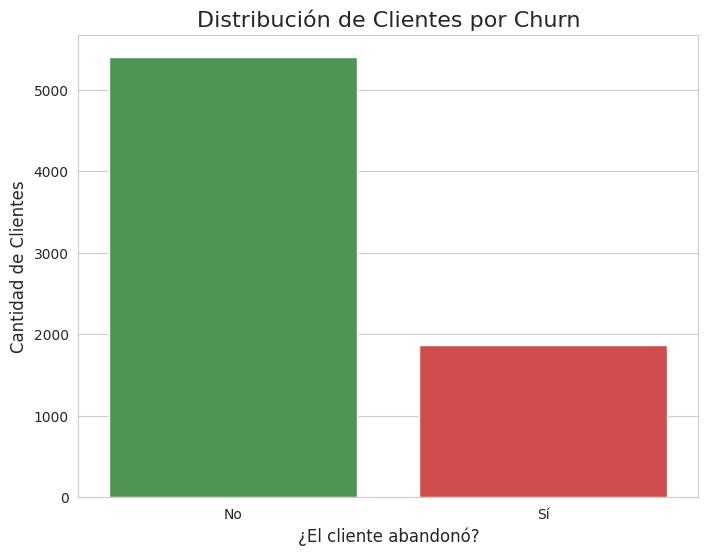

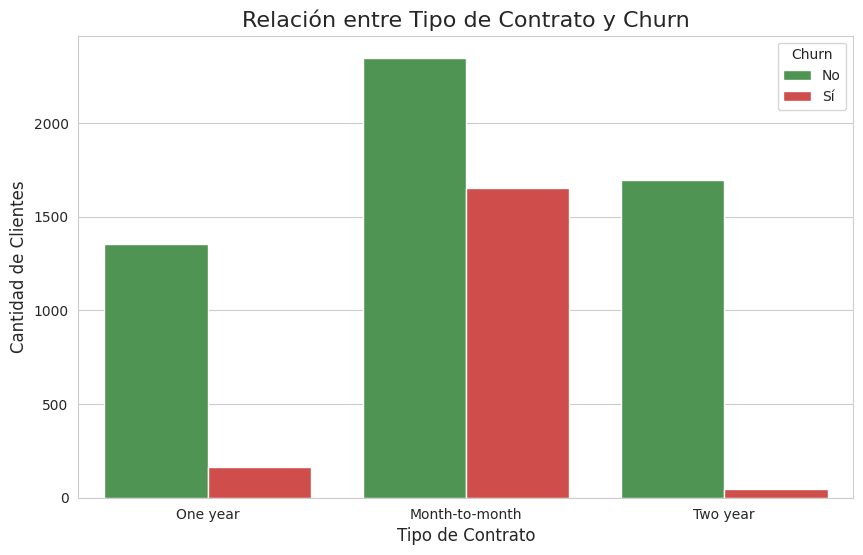

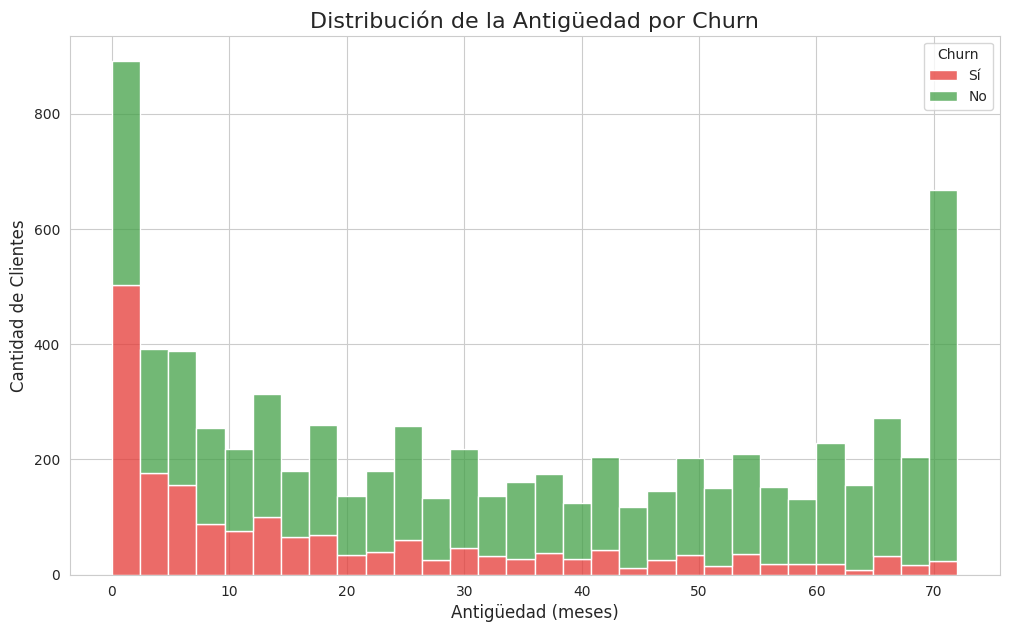

✅ Visualizaciones generadas y guardadas.

--- ✅ PROCESO FINALIZADO CON ÉXITO ---


In [14]:
def main():
    """Función principal que orquesta todo el flujo de trabajo."""
    print("--- INICIANDO PROCESO ETL Y ANÁLISIS ---")

    nombre_archivo_json = 'TelecomX_Data.json'

    datos_json = cargar_datos_locales(nombre_archivo_json)

    if datos_json:
        df_inicial = crear_dataframe_desde_json(datos_json)
        df_final = limpiar_y_transformar_datos(df_inicial)

        print("\n--- Vista previa del DataFrame final ---")
        display(df_final.head())

        generar_visualizaciones(df_final)

        print("\n--- ✅ PROCESO FINALIZADO CON ÉXITO ---")
    else:
        print("\n--- ❌ PROCESO INTERRUMPIDO ---")

# Punto de entrada del script
if __name__ == "__main__":
    main()